<a href="https://colab.research.google.com/github/swetakb15/Data-Science-Projects/blob/main/IPL_Matches_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

LOAD DATA

In [10]:
data = pd.read_csv("/content/IPL Matches 2008-2020.csv")
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [12]:
data.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [14]:
data.drop(['method'],axis=1,inplace=True) #since method column has lots of null valus which will affect our result. 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


Data Visualization

Most Wins In IPL

In [18]:
df=pd.DataFrame({"Winner":data['winner']})
df

,Winner
0,Kolkata Knight Riders
1,Chennai Super Kings
2,Delhi Daredevils
3,Royal Challengers Bangalore
4,Kolkata Knight Riders
...,...
811,Royal Challengers Bangalore
812,Mumbai Indians
813,Sunrisers Hyderabad
814,Delhi Capitals


In [20]:
#Get win count of each team
count_wins = df.value_counts()
print(count_wins)


Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


In [26]:
#label the dataframe
labels = [x[0] for x in count_wins.keys()]
labels 

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

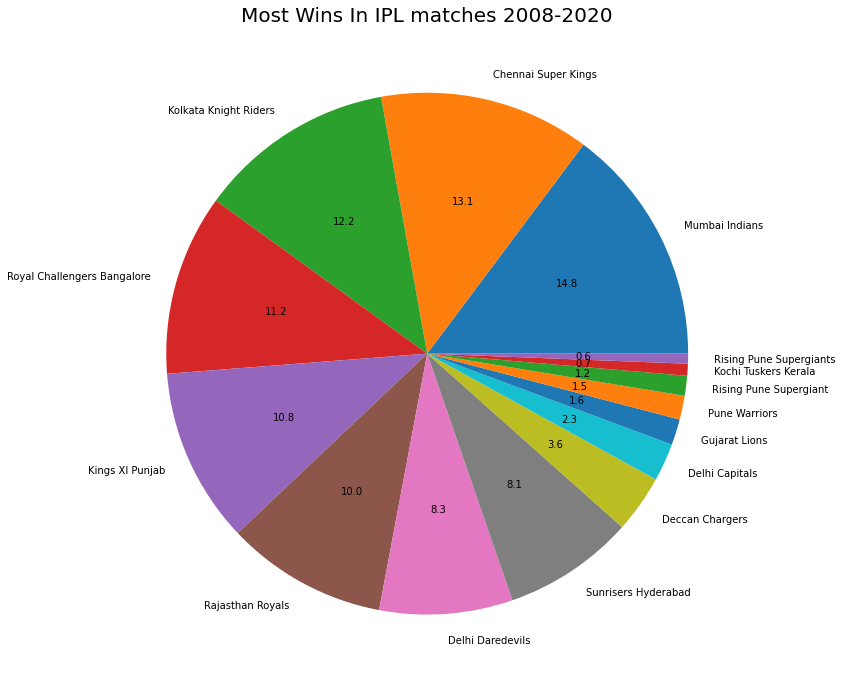

In [33]:
#plot the label details

bar,ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x=count_wins,autopct="%.1f",labels=labels)
plt.title("Most Wins In IPL matches 2008-2020",fontsize=20)
plt.show()

Most wins in eliminator

In [42]:
count_eliminator= pd.DataFrame(data['winner'][data['eliminator']=='Y']).value_counts()
eliminator_team=[x[0] for x in count_eliminator.keys()]
print(eliminator_team)

print(count_eliminator)

['Kings XI Punjab', 'Royal Challengers Bangalore', 'Rajasthan Royals', 'Mumbai Indians', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Kolkata Knight Riders']
winner                     
Kings XI Punjab                3
Royal Challengers Bangalore    2
Rajasthan Royals               2
Mumbai Indians                 2
Delhi Capitals                 2
Sunrisers Hyderabad            1
Kolkata Knight Riders          1
dtype: int64


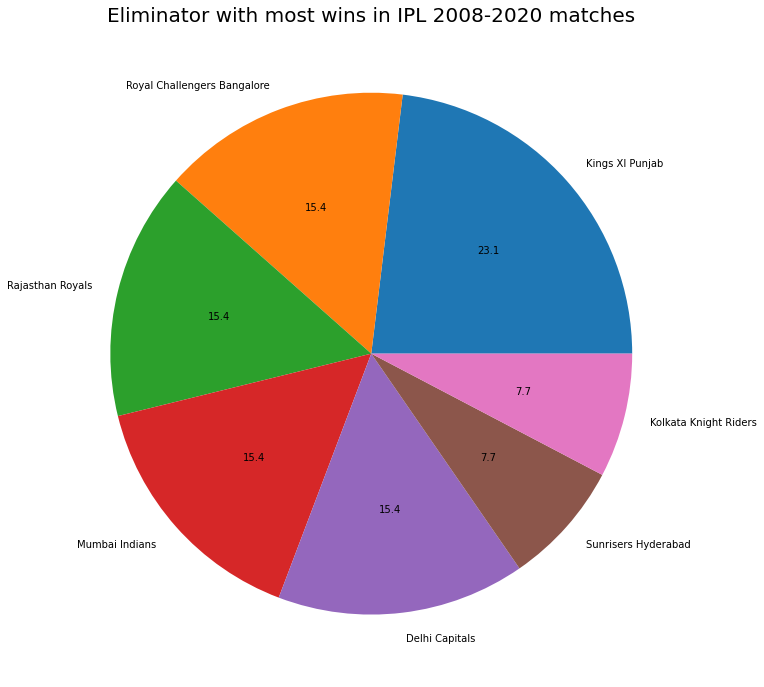

In [45]:
bar,ax = plt.subplots(figsize=(20,12))
ax = plt.pie(count_eliminator,autopct="%.1f",labels=eliminator_team)
plt.title("Eliminator with most wins in IPL 2008-2020 matches",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


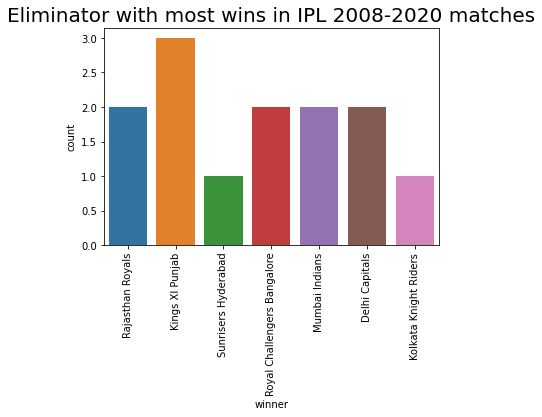

In [51]:
#with seaborn
sns.countplot(data['winner'][data['eliminator']=='Y'],data=data)
plt.title("Eliminator with most wins in IPL 2008-2020 matches",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [52]:
teams = data['toss_winner'].unique()
teams


array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [57]:
#Empty dataframe with three column
df_toss= pd.DataFrame([],columns=["Toss winner","Decision","Times"])

#now will iterate so that df_toss can be filed by values
for id,element in enumerate(teams):
  temp_bat = data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
  temp_field = data[(data['toss_winner']==element) & (data['toss_decision']=='field')]

  df_toss =df_toss.append({'Toss winner':element,'Decision':'bat','Times':temp_bat['toss_winner'].count()},ignore_index=True)
  df_toss =df_toss.append({'Toss winner':element,'Decision':'field','Times':temp_field['toss_winner'].count()},ignore_index=True)


In [59]:
df_toss

,Toss winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


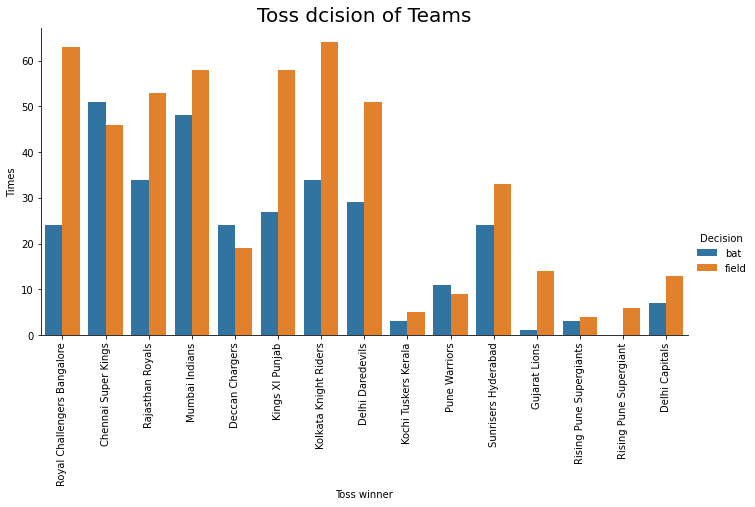

In [71]:
sns.catplot(x='Toss winner',y='Times',hue='Decision',data=df_toss,kind='bar', height = 5,aspect=2)
plt.xticks(rotation=90)
plt.title("Toss dcision of Teams",fontsize=20)
plt.show()

Popular venus


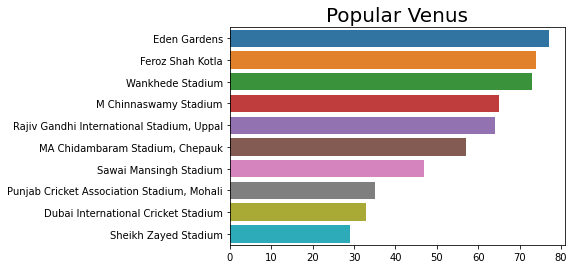

In [75]:
sns.barplot(x=data['venue'].value_counts().head(10).values,
            y=data['venue'].value_counts().head(10).index,
            data=data)
plt.title("Popular Venus",fontsize=20)
plt.show()

Top 5 umpire1

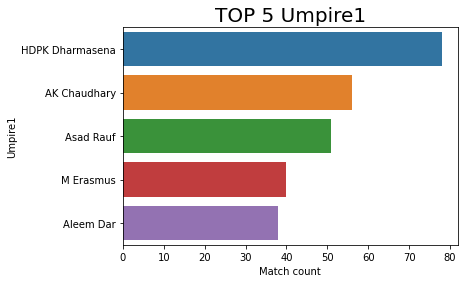

In [85]:
sns.barplot(x=data['umpire1'].value_counts().head(5).values,
            y=data['umpire1'].value_counts().head(5).index,
            data=data)
plt.ylabel("Umpire1")
plt.xlabel("Match count")
plt.title("TOP 5 Umpire1",fontsize=20)
plt.show()

TOP 5 Umpire 2

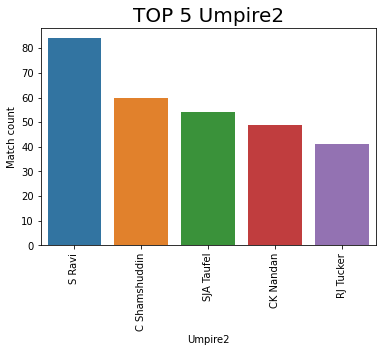

In [84]:
sns.barplot(x=data['umpire2'].value_counts().head(5).index,
            y=data['umpire2'].value_counts().head(5).values,
            data=data)
plt.xlabel("Umpire2")
plt.ylabel("Match count")
plt.title("TOP 5 Umpire2",fontsize=20)
plt.xticks(rotation=90)
plt.show()